## Predicting Close value for Tesla Stock using Linear Regression


### 1. Introduction and Objective: ###

*Stock market is a trading network that connects investors to buy and sell stocks. Here, entrepreneurs seek for investors to help growig their business by funding it. In return, investors seek to earn money from their investment. Understanding the stock market is important as it not only helps individuals, companies, but also significantly contributes to the overall economy.*

**Problem Statement**: *The goal of this model is to predict future Close value, helping investors to make decision for investment and trading, while helping the companies to understand their situation and make decision to improve their market.*


### 2. Data Description: ### 

*The historical data below reflects the stock and estimated worth of Tesla every day over the course of 2024-2025. This data is collected from Yahoo Finance. The data summarize the stock value each day, including the highs and lows, open and close value, and the volume of the company at the end of the day. Understanding this data is significant to making the decision for investment or trading.*


**Data Set-up**

In [1]:
#Importing Libraries and Loading Data
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_excel('Tesla.xlsx')


**Basic information about the data set**

In [2]:
# Displaying the first few rows of the dataset
df.head(23)
# Descriptive statistics
df.describe()
print(df.columns)

# Shape of the dataset
print("Dataset Shape:", df.shape)

# Data types of the columns
print("\nData Types:\n", df.dtypes)

# Checking for missing values
print("\nMissing Values:\n", df.isnull().sum())

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Dataset Shape: (252, 7)

Data Types:
 Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

Missing Values:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


### 3. Data Preprocessing: ###

*After loading the csv file into dataframe, I will convert the date into numerical values so that they could be understood and used for the model. The data is split into different columns for specific day, month, and year.
Since I am training the dataset to predict the Close value, I will be setting the Close column to y.*


In [3]:
# convert Data column to datetime format so we can extract year, day, etc. to numerical values
df['Date'] = pd.to_datetime(df['Date']) 

# Extract numerical features from the datetime column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek

# Drop the original datetime column
df = df.drop(columns=['Date'])

# setting X and y
X = df.drop('Close', axis=1) 
y = df['Close']

### 4. Training and Testing Set: ###

*The data will be split into 2 sets randomly. The Training set contains 80% of the data, used to train the regressor. The Testing contains the rest of the 20 %, and will be used once the regressor is trained. The regressor will then use the X test to predict the Y.*

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#split data into 80% for training and 20% for testing

### 5. Multiple Linear Regression Model ###



In [5]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### 6. Algorithm of the solution (the process detail) ###

**1. Data Processing:**
   - Upload data into a dataframe.
   - Convert the date into datetime format and separate the values into numerical values.
   - Define `X` (independent variables) and `Y` (dependent variable).
   - Split the data into training and testing sets.

**2. Execution:**
   - Use Linear Regression to create the regressor, then use the regressor to predict `y_test`.
   - Calculate the Mean Squared Error (MSE) and \( R^2 \) to determine the accuracy of the prediction.
   - Plot `y_pred` versus `y_test` to visually observe the prediction results.



### 7. Model Implementation: ###

**Different libraries are imported as below:**

- The data is being read into dataframe using pandas.
- Matplotlib helps plotting `y_pred` and `y_test`
- train_test_split will be used to split data randomly into the sets
- LinearRegression is used to train the regressor
- Mean Square Error and R^2 is calculated using skleanr.metrics



In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


### 8. Regression Output and Predictions ###


*Make prediction using test set*

In [7]:
y_pred = regressor.predict(X_test) # use the trained regressor to make predictions on test set (x_test), store predicted value in y_pred

*MSE and R^2*

In [8]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred)) #calculate and print the Mean Square Error between actual value y_test and predicted y_pred
print("Coefficient of Determination:", r2_score(y_test, y_pred)) # CoD indicates how well a model's prediction match the actual data


Mean Squared Error: 2.0489097779280033e-22
Coefficient of Determination: 1.0


*Scatter Plot*

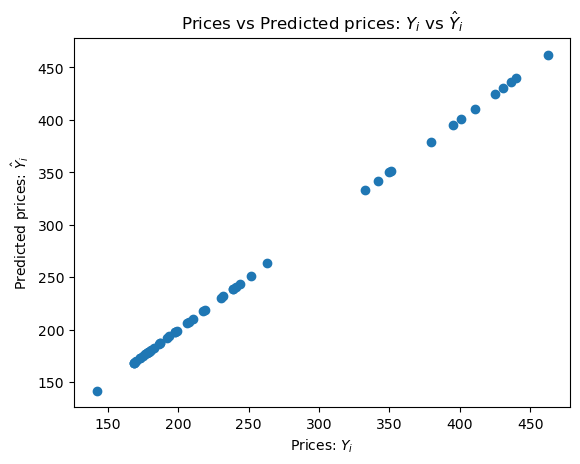

In [9]:
#Plot
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel(r"Predicted prices: $\hat{Y}_i$")
plt.title(r"Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

*Residual analysis*

* As observed below, the histogram shows a random distribution. This indicates that there is no bias or assumed pattern about the model 

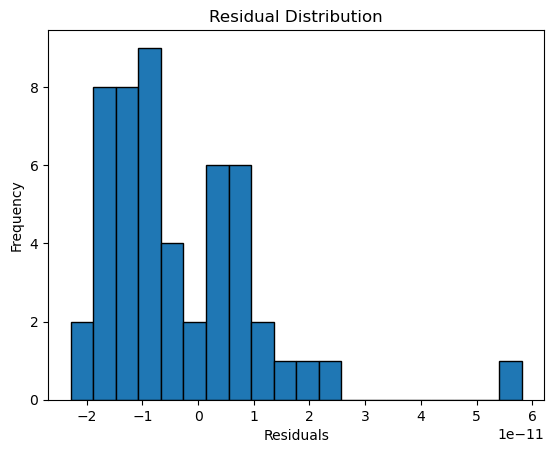

In [10]:
residuals = y_test - y_pred
plt.hist(residuals, bins=20, edgecolor='k')
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()



### 9. Analysis of the Findings ###

**The calculation provided the result of**
- Mean Squared Error: 2.0489097779280033e-22
- Coefficient of Determination: 1.0
* As observed, the MSE was a small value and r^2 has a value of 1, indicating a more accurate prediction, meaning model is performing well. R^2 = 1 shows that model's prediction explain most of the variance in the data*

**To further depict the prediction, a scatter plot between `y_pred` and `y_test` is provided below. As seen, The plotted points align to a 45-degree diagonal line, indicating that the predicted values are close to the actual values.**




### 10. Final Investment Worthiness Prediction ###
*The prediction shows that Tesla's stock value will continue to rise. The model could be use for future prediction of Close value, allowing investors have a daily observation of the stock value to make decision on their investment*


### 11. Model Improvement ###

*One of the ways to improve the prediction is by* **using only significant variables** *. By doing so, we are eliminating unnecessary noise, increading interpretability, which altogether provides a higher predictive accuracy*

*To remove insignificant values, p-value will be used. Variables with p < 0.05 indicates that they are significant to the model. As a result, we will be removing all variables with p > 0.05 using* **statsmodels**

*In this case, the only significant value was Adjust Close, which is then used to train the regressor. The prediction provided was the same as without the improvement. This is because the Adjust Close is closely correlated with the Close value, causing the model to basically predicting using itself*

**Solution**

*Drop the Adjust Close value from X*


Dropping 'const' with p-value: 0.9999668820075117
Dropping 'Open' with p-value: 0.9999393805412673
Dropping 'High' with p-value: 0.9996638420280395
Dropping 'Low' with p-value: 0.9711182051301268
Dropping 'Year' with p-value: 0.9997007254537936
Dropping 'Month' with p-value: 0.9956279020519658
Dropping 'Day' with p-value: 0.9986359819497743
Dropping 'DayOfWeek' with p-value: 0.999435017256621
Dropping 'Volume' with p-value: 0.15341895099217337
                                 OLS Regression Results                                
Dep. Variable:                  Close   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.245e+33
Date:                Sat, 18 Jan 2025   Prob (F-statistic):                        0.00
Time:                        17:22:38   Log-Likelihood:                          7155.5
No. Observations:       

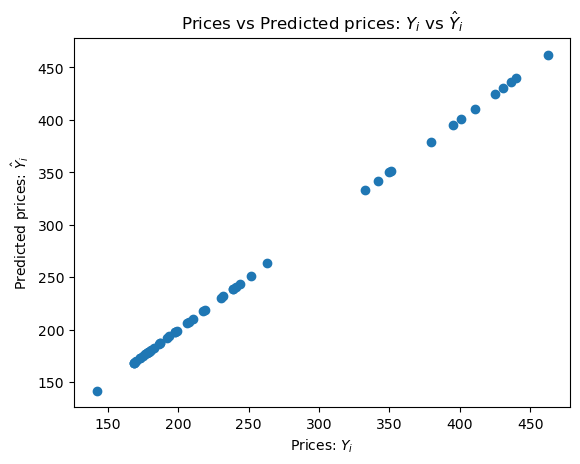

In [11]:
# Import necessary libraries
import statsmodels.api as sm

# Setting X and y
X = df.drop('Close', axis=1)  # Features (independent variables)
y = df['Close']  # Target (dependent variable)

# Add a constant (intercept) to X for regression
X = sm.add_constant(X)

# Iteratively drop insignificant variables
def drop_insignificant_variables(X, y, significance_level=0.05):
    while True:
        # Fit the model
        model = sm.OLS(y, X).fit()

        # Get the p-values for each variable
        p_values = model.pvalues

        # Identify the variables with p > significance_level
        insignificant_vars = p_values[p_values > significance_level].index

        # Stop if no insignificant variables remain (besides 'const')
        if len(insignificant_vars) == 0 or (len(insignificant_vars) == 1 and 'const' in insignificant_vars):
            break

        # Drop the most insignificant variable
        drop_var = insignificant_vars[0]
        X = X.drop(columns=drop_var)
        print(f"Dropping '{drop_var}' with p-value: {p_values[drop_var]}")

    # Return the modified features and the final model
    return X, model

# Apply the function to drop insignificant variables
X_significant, final_model = drop_insignificant_variables(X, y)

# Print the final model summary
print(final_model.summary())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#split data into 80% for training and 20% for testing

#Linear Regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Calculate MSE and R^2
y_pred = regressor.predict(X_test) # use the trained regressor to make predictions on test set (x_test), store predicted value in y_pred
print("Mean Squared Error:", mean_squared_error(y_test, y_pred)) #calculate and print the Mean Square Error between actual value y_test and predicted y_pred
print("Coefficient of Determination:", r2_score(y_test, y_pred)) # CoD indicates how well a model's prediction match the actual data

#Plot
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel(r"Predicted prices: $\hat{Y}_i$")
plt.title(r"Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()


### 12. Christian Worldview Perspective ###
* Aside of statistical and financial factors, investors should also consider*  **the company ethical values and contributions to community**. It is important to understand whether a company is treating their employees and consumers fairly. The Bible teaches us that loving one another and act justly is significant. Thus, a company who adhere to these standard is the one who has integrity. Another factor to consider is the contributions that the company makes, including donations, support for the environment, etc.
* Contributions is a factor that could be measured by numbers. However, integrity is a qualitative one. Essentially, it boils down to an individual's belief and values to make decisions that align with their ethics.


### 13. The Full Code ###

*Execute the model, including data preprocessing, model fitting, and prediction steps.*


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Mean Squared Error: 2.0489097779280033e-22
Coefficient of Determination: 1.0


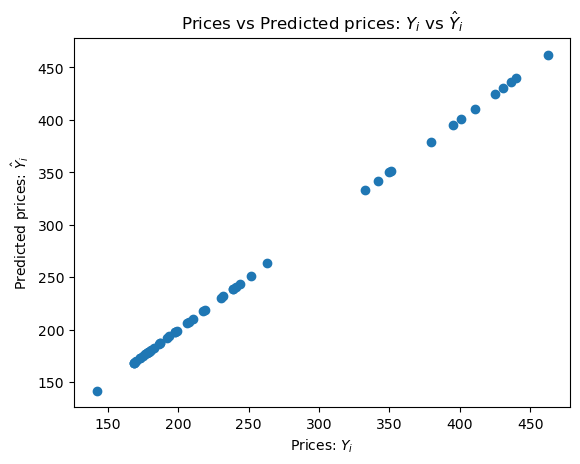

In [12]:
#Importing Libraries and Loading Data
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



df = pd.read_excel('Tesla.xlsx')


# Displaying the first few rows of the dataset
df.head(23)
# Descriptive statistics
df.describe()
print(df.columns)

# Convert Data column to datetime format so we can extract year, day, etc. to numerical values
df['Date'] = pd.to_datetime(df['Date']) 

# Extract numerical features from the datetime column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek

# Drop the original datetime column
df = df.drop(columns=['Date'])

#Setting X and y
X = df.drop('Close', axis=1) 
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#split data into 80% for training and 20% for testing

#Linear Regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Calculate MSE and R^2
y_pred = regressor.predict(X_test) # use the trained regressor to make predictions on test set (x_test), store predicted value in y_pred
print("Mean Squared Error:", mean_squared_error(y_test, y_pred)) #calculate and print the Mean Square Error between actual value y_test and predicted y_pred
print("Coefficient of Determination:", r2_score(y_test, y_pred)) # CoD indicates how well a model's prediction match the actual data

#Plot
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel(r"Predicted prices: $\hat{Y}_i$")
plt.title(r"Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()


### 14. References ###

- Stock data: https://finance.yahoo.com/quote/TSLA/history/
- Stock Market Definition: https://www.dowjones.com/smartmoney/what-is-the-stock-market/
- Close value Definition: https://www.investopedia.com/terms/c/close_location_value.asp#:~:text=Close%20location%20value%20(CLV)%20indicates,closer%20to%20the%20day's%20low.
